In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

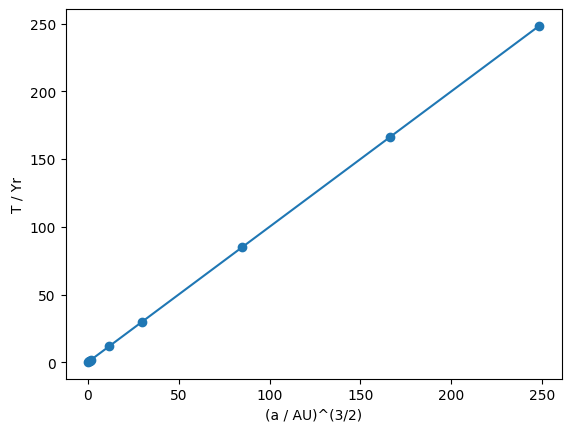

Gradient of graph (years * AU^(-3/2)):  1.000036090515211


In [38]:
semi_major_axes = [0.387, 0.723, 1.000, 1.523, 5.202, 9.576, 19.293, 30.246, 39.509]
orbital_periods = [0.241, 0.615, 1.000, 1.881, 11.861, 29.628, 84.747, 166.344, 248.348]
eccentricities = [0.21, 0.01, 0.02, 0.09, 0.05, 0.06, 0.05, 0.01, 0.25]

semi_major_axes_scaled = [(x ** (3/2)) for x in semi_major_axes]

fig, ax = plt.subplots()

ax.scatter(semi_major_axes_scaled, orbital_periods)
slope, intercept = np.polyfit(semi_major_axes_scaled, orbital_periods, 1)
ax.plot(np.unique(semi_major_axes_scaled), np.poly1d((slope, intercept))(np.unique(semi_major_axes_scaled)))
ax.set_xlabel("(a / AU)^(3/2)")
ax.set_ylabel("T / Yr")
plt.show()

print("Gradient of graph (years * AU^(-3/2)): ", slope)

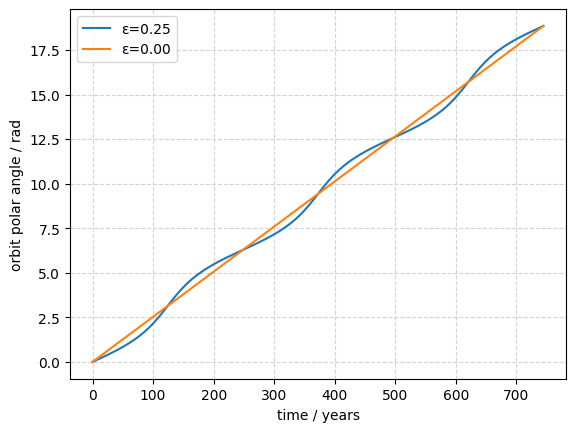

In [39]:
def theta_graph(theta, P, eccentricity):
    def integrand(theta_integrand, P, eccentricity):
        return (P * ((1-(eccentricity**2)) ** (3/2)) * (1/(2 * math.pi * ((1 - (eccentricity*np.cos(theta_integrand))) ** 2))))
    curr_I = 0
    curr_theta = 0
    cum_I = [0]
    cum_x = [0]
    h = 1/1000
    iterations = math.floor(theta/h)
    for i in range(iterations):
        prev_theta = curr_theta
        curr_theta += h
        if len(cum_I) <= 2:
            curr_I += (1/3)*h*integrand(curr_theta, P, eccentricity)
        elif len(cum_I) % 2 == 0:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + integrand(prev_theta, P, eccentricity))
        else:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + (3*integrand(prev_theta, P, eccentricity)))
        cum_I.append(curr_I)
        cum_x.append(cum_x[-1] + h)
    return cum_I, cum_x

x_vals, y_vals = theta_graph(6*math.pi, orbital_periods[8], eccentricities[8])

fig, ax = plt.subplots()
ax.grid(color='lightgray', linestyle='--')
pluto_e_handle, = ax.plot(x_vals, y_vals, label="\u03B5=0.25")

zero_e_y_vals = [x_val * 2 * math.pi / orbital_periods[8] for x_val in x_vals]
zero_e_handle, = ax.plot(x_vals, zero_e_y_vals, label="\u03B5=0.00")

ax.legend(handles=[pluto_e_handle, zero_e_handle], loc = "upper left")
ax.set_xlabel('time / years')
ax.set_ylabel('orbit polar angle / rad')
plt.show()

 99% (249 of 250) |##################### | Elapsed Time: 0:00:36 ETA:   0:00:00

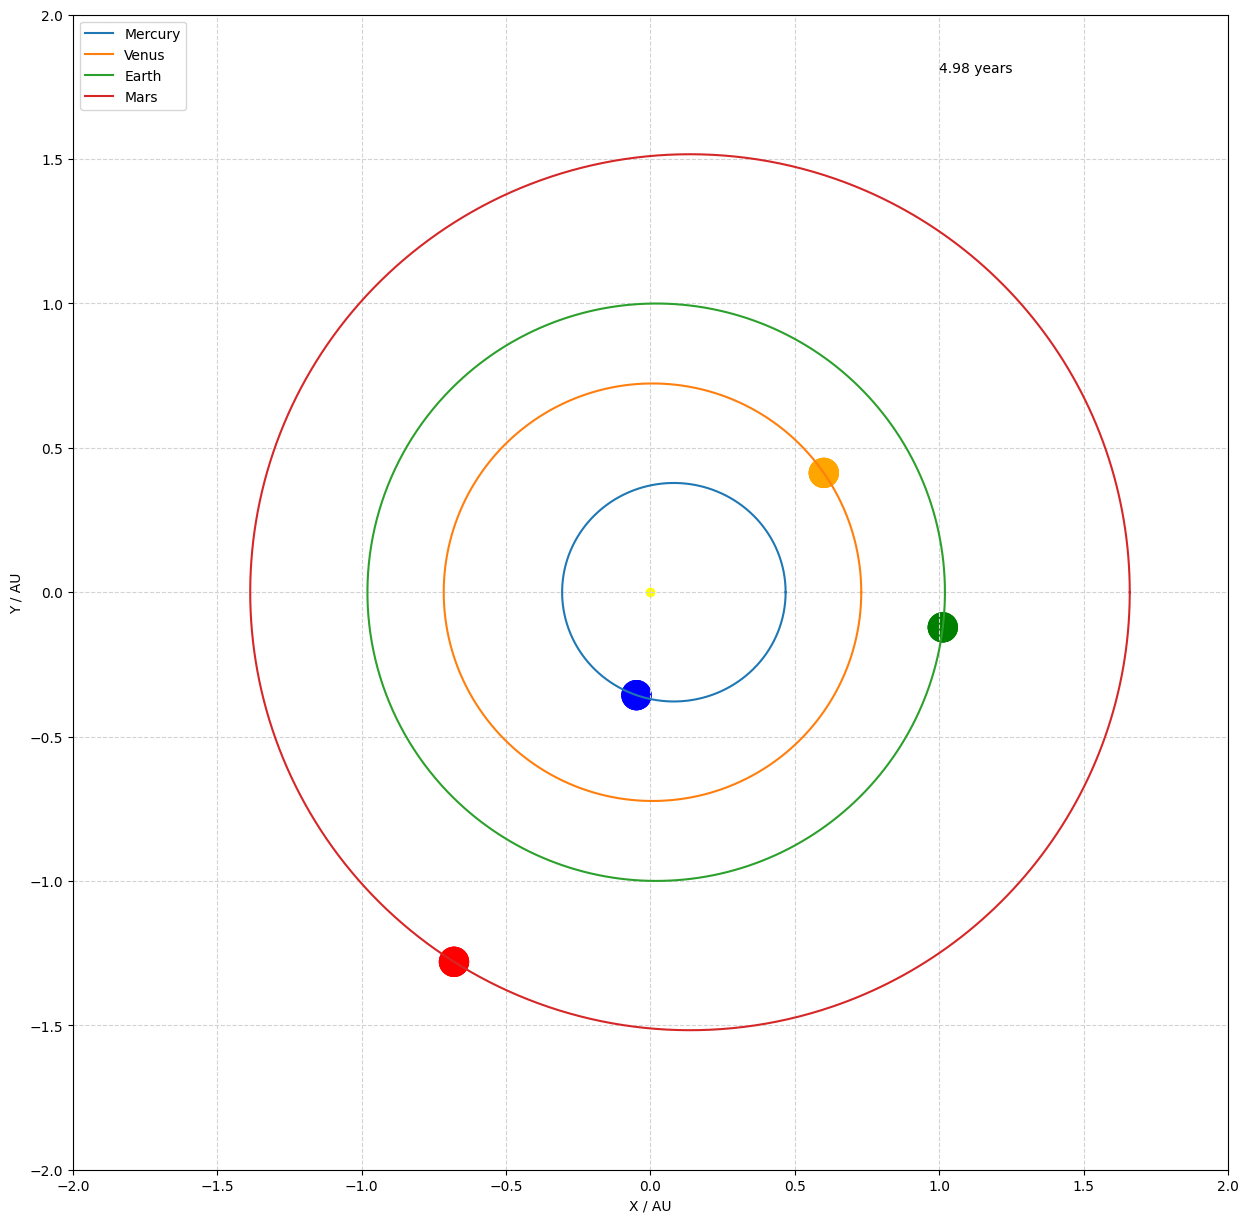

In [51]:
import progressbar

timestep = 0.02
time_elapsed = 0.00

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))

ax.set_xlabel('X / AU')
ax.set_ylabel('Y / AU')

names = ["Mercury", "Venus", "Earth", "Mars"]

label = ax.text(1, 1.8, "{:.2f}".format(time_elapsed) + " years")
handles = []        

ax.scatter(0, 0, color='yellow')
for i in range(4):
    x_values = []
    y_values = []
    for t in np.linspace(0, 2*math.pi, 1000):
        r = (semi_major_axes[i]*(1-(eccentricities[i] ** 2)))/(1-(eccentricities[i] * np.cos(t)))
        x = r*np.cos(t)
        y = r*np.sin(t)
        x_values.append(x)
        y_values.append(y)   
    handle, = ax.plot(x_values, y_values, label=names[i])
    handles.append(handle)
ax.grid(color='lightgray', linestyle='--')
plt.gca().set_aspect("equal")
ax.legend(handles=handles, loc="upper left")
bar = progressbar.ProgressBar(max_value=250)

mercury = plt.Circle((semi_major_axes[0], 0), 0.05, color="blue")
venus = plt.Circle((semi_major_axes[1], 0), 0.05, color="orange")
earth = plt.Circle((semi_major_axes[2], 0), 0.05, color="green")
mars = plt.Circle((semi_major_axes[3], 0), 0.05, color="red")

mercury_y_predicted, mercury_x_predicted = theta_graph(2.1*math.pi, orbital_periods[0], eccentricities[0])
venus_y_predicted, venus_x_predicted = theta_graph(2.1*math.pi, orbital_periods[1], eccentricities[1])
earth_y_predicted, earth_x_predicted = theta_graph(2.1*math.pi, orbital_periods[2], eccentricities[2])
mars_y_predicted, mars_x_predicted = theta_graph(2.1*math.pi, orbital_periods[3], eccentricities[3])

def init():
    ax.add_patch(mercury)
    ax.add_patch(venus)
    ax.add_patch(earth)
    ax.add_patch(mars)
    return mercury, venus, earth, mars


def update(i):
    bar.update(i)
    time_elapsed = timestep*i
    label.set_text("{:.2f}".format(time_elapsed) + " years")

    mercury_x, mercury_y = mercury.center
    mercury_theta = np.interp((timestep*i) % orbital_periods[0], mercury_y_predicted, mercury_x_predicted)
    mercury_r = (semi_major_axes[0]*(1-(eccentricities[0] ** 2)))/(1-(eccentricities[0] * np.cos(mercury_theta)))
    mercury_x = mercury_r*np.cos(mercury_theta)
    mercury_y = mercury_r*np.sin(mercury_theta)
    mercury.center = (mercury_x, mercury_y)

    venus_x, venus_y = venus.center
    venus_theta = np.interp((timestep*i) % orbital_periods[1], venus_y_predicted, venus_x_predicted)
    venus_r = (semi_major_axes[1]*(1-(eccentricities[1] ** 2)))/(1-(eccentricities[1] * np.cos(venus_theta)))
    venus_x = venus_r*np.cos(venus_theta)
    venus_y = venus_r*np.sin(venus_theta)
    venus.center = (venus_x, venus_y)

    earth_x, earth_y = earth.center
    earth_theta = np.interp((timestep*i) % orbital_periods[2], earth_y_predicted, earth_x_predicted)
    earth_r = (semi_major_axes[2]*(1-(eccentricities[2] ** 2)))/(1-(eccentricities[2] * np.cos(earth_theta)))
    earth_x = earth_r*np.cos(earth_theta)
    earth_y = earth_r*np.sin(earth_theta)
    earth.center = (earth_x, earth_y)

    mars_x, mars_y = mars.center
    mars_theta = np.interp((timestep*i) % orbital_periods[3], mars_y_predicted, mars_x_predicted)
    mars_r = (semi_major_axes[3]*(1-(eccentricities[3] ** 2)))/(1-(eccentricities[3] * np.cos(mars_theta)))
    mars_x = mars_r*np.cos(mars_theta)
    mars_y = mars_r*np.sin(mars_theta)
    mars.center = (mars_x, mars_y)
    return mercury, venus, earth, mars

a = anim.FuncAnimation(fig, update, 
                       init_func=init, 
                       frames=250, 
                       interval=20,
                       blit=True)


f = "AppIcon.gif"
writergif = anim.PillowWriter(fps=50) 
a.save(f, writer=writergif)
        

100% (999 of 999) |######################| Elapsed Time: 0:02:10 ETA:  00:00:00

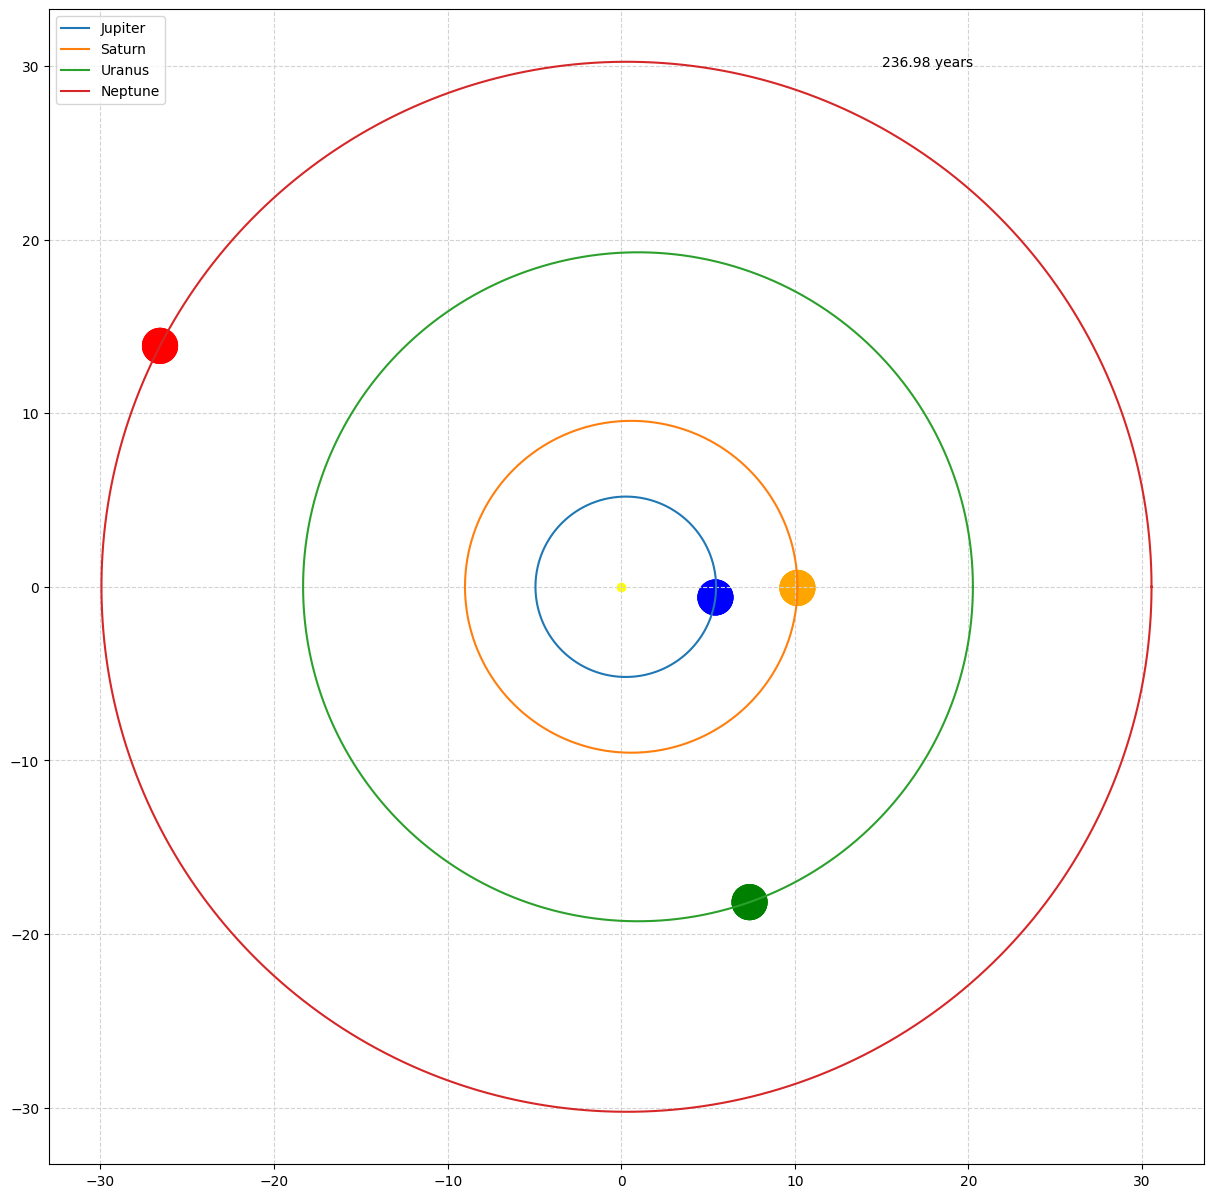

In [52]:
semi_major_axes = [0.387, 0.723, 1.000, 1.523, 5.202, 9.576, 19.293, 30.246, 39.509]
orbital_periods = [0.241, 0.615, 1.000, 1.881, 11.861, 29.628, 84.747, 166.344, 248.348]
eccentricities = [0.21, 0.01, 0.02, 0.09, 0.05, 0.06, 0.05, 0.01, 0.25]

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
timestep = 0.02 * orbital_periods[4]
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"]
handles = []
time_elapsed = 0


ax.scatter(0, 0, color='yellow')
for i in range(4, 8):
    x_values = []
    y_values = []
    for t in np.linspace(0, 2*math.pi, 1000):
        r = (semi_major_axes[i]*(1-(eccentricities[i] ** 2)))/(1-(eccentricities[i] * np.cos(t)))
        x = r*np.cos(t)
        y = r*np.sin(t)
        x_values.append(x)
        y_values.append(y)   
    handle, = ax.plot(x_values, y_values, label=names[i])
    handles.append(handle)
    

ax.grid(color='lightgray', linestyle='--')
plt.gca().set_aspect("equal")
ax.legend(handles=handles, loc='upper left')
label = ax.text(15, 30, "{:.2f}".format(time_elapsed) + " years")
bar = progressbar.ProgressBar(max_value=999)

jupiter = plt.Circle((semi_major_axes[4], 0), 1, color="blue")
saturn = plt.Circle((semi_major_axes[5], 0), 1, color="orange")
uranus = plt.Circle((semi_major_axes[6], 0), 1, color="green")
neptune = plt.Circle((semi_major_axes[7], 0), 1, color="red")

jupiter_y_predicted, jupiter_x_predicted = theta_graph(2.1*math.pi, orbital_periods[4], eccentricities[4])
saturn_y_predicted, saturn_x_predicted = theta_graph(2.1*math.pi, orbital_periods[5], eccentricities[5])
uranus_y_predicted, uranus_x_predicted = theta_graph(2.1*math.pi, orbital_periods[6], eccentricities[6])
neptune_y_predicted, neptune_x_predicted = theta_graph(2.1*math.pi, orbital_periods[7], eccentricities[7])

def init():
    ax.add_patch(jupiter)
    ax.add_patch(saturn)
    ax.add_patch(uranus)
    ax.add_patch(neptune)
    return jupiter, saturn, uranus, neptune

def update(i):
    bar.update(i)
    time_elapsed = timestep*i
    label.set_text("{:.2f}".format(time_elapsed) + " years")
    
    jupiter_x, jupiter_y = jupiter.center
    jupiter_theta = np.interp((timestep*i) % orbital_periods[4], jupiter_y_predicted, jupiter_x_predicted)
    jupiter_r = (semi_major_axes[4]*(1-(eccentricities[4] ** 2)))/(1-(eccentricities[4] * np.cos(jupiter_theta)))
    jupiter_x = jupiter_r*np.cos(jupiter_theta)
    jupiter_y = jupiter_r*np.sin(jupiter_theta)
    jupiter.center = (jupiter_x, jupiter_y)
    
    saturn_x, saturn_y = saturn.center
    saturn_theta = np.interp((timestep*i) % orbital_periods[5], saturn_y_predicted, saturn_x_predicted)
    saturn_r = (semi_major_axes[5]*(1-(eccentricities[5] ** 2)))/(1-(eccentricities[5] * np.cos(saturn_theta)))
    saturn_x = saturn_r*np.cos(saturn_theta)
    saturn_y = saturn_r*np.sin(saturn_theta)
    saturn.center = (saturn_x, saturn_y)
    
    uranus_x, uranus_y = uranus.center
    uranus_theta = np.interp((timestep*i) % orbital_periods[6], uranus_y_predicted, uranus_x_predicted)
    uranus_r = (semi_major_axes[6]*(1-(eccentricities[6] ** 2)))/(1-(eccentricities[6] * np.cos(uranus_theta)))
    uranus_x = uranus_r*np.cos(uranus_theta)
    uranus_y = uranus_r*np.sin(uranus_theta)
    uranus.center = (uranus_x, uranus_y)
    
    neptune_x, neptune_y = neptune.center
    neptune_theta = np.interp((timestep*i) % orbital_periods[7], neptune_y_predicted, neptune_x_predicted)
    neptune_r = (semi_major_axes[7]*(1-(eccentricities[7] ** 2)))/(1-(eccentricities[7] * np.cos(neptune_theta)))
    neptune_x = neptune_r*np.cos(neptune_theta)
    neptune_y = neptune_r*np.sin(neptune_theta)
    neptune.center = (neptune_x, neptune_y)
    
    
    return jupiter, saturn, uranus, neptune

a = anim.FuncAnimation(fig, update, 
                       init_func=init, 
                       frames=1000, 
                       interval=20,
                       blit=True)


f = "OuterPlanets2DAnimation.gif" 
writergif = anim.PillowWriter(fps=50) 
a.save(f, writer=writergif)

100% (249 of 249) |######################| Elapsed Time: 0:00:26 ETA:  00:00:00

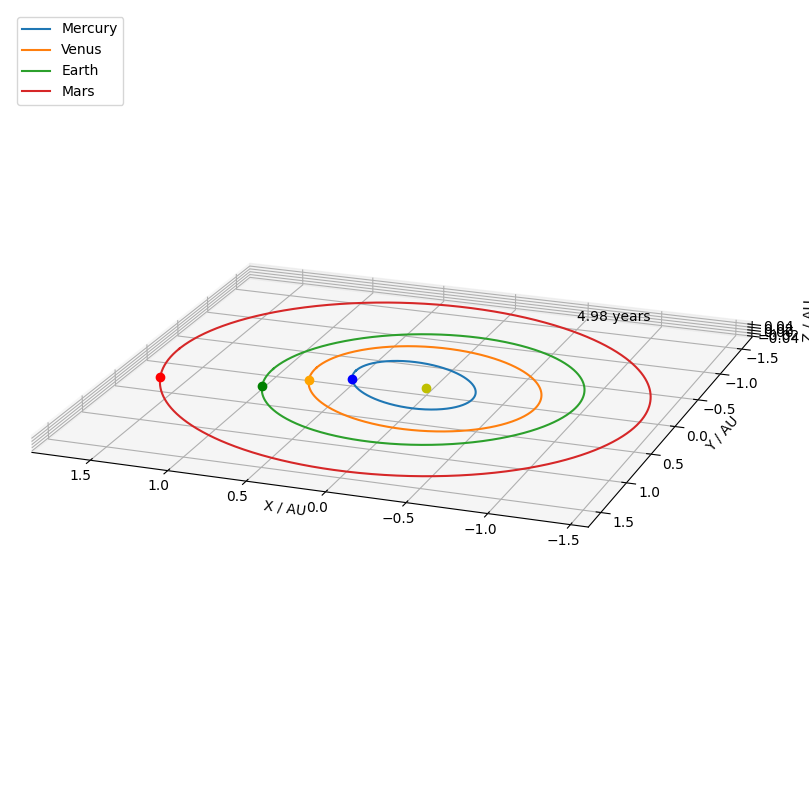

In [53]:
inclination_angles = [i*2*math.pi/360 for i in [7.00, 3.39, 0.00, 1.95, 1.31, 2.49, 0.77, 1.77, 17.5]]
timestep = 0.02 * orbital_periods[2]
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
ax = fig.add_subplot(projection='3d')
handles = []

names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

for i in range(4):
    x_values = []
    y_values = []
    z_values = []
    for t in np.linspace(0, 2*math.pi, 1000):
        r = (semi_major_axes[i]*(1-(eccentricities[i] ** 2)))/(1-(eccentricities[i] * np.cos(t)))
        x = r*np.cos(t)*np.cos(inclination_angles[i])
        y = r*np.sin(t)
        z = r*np.cos(t)*np.sin(inclination_angles[i])
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
    handle, = ax.plot3D(x_values, y_values, z_values, label=names[i])
    handles.append(handle)

ax.legend(handles=handles, loc='upper left')
label = ax.text(-0.5, -1.5, 0.01, "{:.2f}".format(time_elapsed) + " years")
bar = progressbar.ProgressBar(max_value=249)

mercury_x = semi_major_axes[0] * (1 + eccentricities[0]) * np.cos(inclination_angles[0])
mercury_y = 0
mercury_z = 0
venus_x = semi_major_axes[1] * (1 + eccentricities[1]) * np.cos(inclination_angles[1])
venus_y = 0
venus_z = 0
earth_x = semi_major_axes[2] * (1 + eccentricities[2]) * np.cos(inclination_angles[2])
earth_y = 0
earth_z = 0
mars_x = semi_major_axes[3] * (1 + eccentricities[3]) * np.cos(inclination_angles[3])
mars_y = 0
mars_z = 0

sun, = ax.plot3D(0, 0, 0, 'yo')
mercury, = ax.plot3D(mercury_x, mercury_y, mercury_z, color='blue', marker='o')
venus, = ax.plot3D(venus_x, venus_y, venus_z, color='orange', marker='o')
earth, = ax.plot3D(earth_x, earth_y, earth_z, color='green', marker='o')
mars, = ax.plot3D(mars_x, mars_y, mars_z, color='red', marker='o')

def update(i):
    global mercury
    global venus
    global earth
    global mars
    
    bar.update(i)
    time_elapsed = timestep*i
    label.set_text("{:.2f}".format(time_elapsed) + " years")
    
    mercury.remove()
    venus.remove()
    earth.remove()
    mars.remove()
    
    mercury_theta = np.interp(timestep*i, mercury_y_predicted, mercury_x_predicted)
    venus_theta = np.interp(timestep*i, venus_y_predicted, venus_x_predicted)
    earth_theta = np.interp(timestep*i, earth_y_predicted, earth_x_predicted)
    mars_theta = np.interp(timestep*i, mars_y_predicted, mars_x_predicted)
    
    mercury_r = (semi_major_axes[0]*(1-(eccentricities[0] ** 2)))/(1-(eccentricities[0] * np.cos(mercury_theta)))
    venus_r = (semi_major_axes[1]*(1-(eccentricities[1] ** 2)))/(1-(eccentricities[1] * np.cos(venus_theta)))
    earth_r = (semi_major_axes[2]*(1-(eccentricities[2] ** 2)))/(1-(eccentricities[2] * np.cos(earth_theta)))
    mars_r = (semi_major_axes[3]*(1-(eccentricities[3] ** 2)))/(1-(eccentricities[3] * np.cos(mars_theta)))
    
    mercury_x = mercury_r*np.cos(mercury_theta)*np.cos(inclination_angles[0])
    venus_x = venus_r*np.cos(venus_theta)*np.cos(inclination_angles[1])
    earth_x = earth_r*np.cos(earth_theta)*np.cos(inclination_angles[2])
    mars_x = mars_r*np.cos(mars_theta)*np.cos(inclination_angles[3])
    
    mercury_y = mercury_r*np.sin(mercury_theta)
    venus_y = venus_r*np.sin(venus_theta)
    earth_y = earth_r*np.sin(earth_theta)
    mars_y = mars_r*np.sin(mars_theta)
    
    mercury_z = mercury_r*np.cos(mercury_theta)*np.sin(inclination_angles[0])
    venus_z = venus_r*np.cos(venus_theta)*np.sin(inclination_angles[1])
    earth_z = earth_r*np.cos(earth_theta)*np.sin(inclination_angles[2])
    mars_z = mars_r*np.cos(mars_theta)*np.sin(inclination_angles[3])
    
    mercury, = ax.plot3D(mercury_x, mercury_y, mercury_z, color='blue', marker='o')
    venus, = ax.plot3D(venus_x, venus_y, venus_z, color='orange', marker='o')
    earth, = ax.plot3D(earth_x, earth_y, earth_z, color='green', marker='o')
    mars, = ax.plot3D(mars_x, mars_y, mars_z, color='red', marker='o')
    
    return mercury, venus, earth, mars
    
ax.grid(color='lightgray', linestyle='--')
plt.gca().set_aspect("equal")

ax.set_xlabel('X / AU')
ax.set_ylabel('Y / AU')
ax.set_zlabel('Z / AU')

ax.view_init(elev=20, azim=110)

a = anim.FuncAnimation(fig, update,
                       frames=250, 
                       interval=20,
                       blit=True)


f = "InnerPlanets3DAnimation.gif" 
writergif = anim.PillowWriter(fps=50) 
a.save(f, writer=writergif)

plt.show()

100% (1499 of 1499) |####################| Elapsed Time: 0:02:55 ETA:  00:00:00

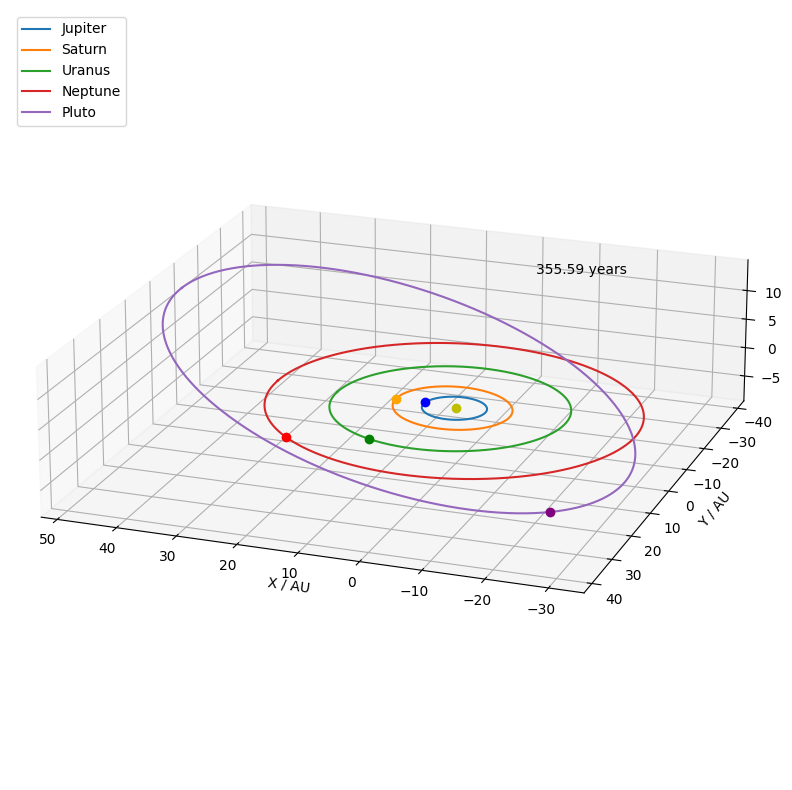

In [54]:
inclination_angles = [i*2*math.pi/360 for i in [7.00, 3.39, 0.00, 1.95, 1.31, 2.49, 0.77, 1.77, 17.5]]
timestep = 0.02 * orbital_periods[4]
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
ax = fig.add_subplot(projection='3d')
handles = []

names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

for i in range(4, 9):
    x_values = []
    y_values = []
    z_values = []
    for t in np.linspace(0, 2*math.pi, 1000):
        r = (semi_major_axes[i]*(1-(eccentricities[i] ** 2)))/(1-(eccentricities[i] * np.cos(t)))
        x = r*np.cos(t)*np.cos(inclination_angles[i])
        y = r*np.sin(t)
        z = r*np.cos(t)*np.sin(inclination_angles[i])
        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
    handle, = ax.plot3D(x_values, y_values, z_values, label=names[i])
    handles.append(handle)

ax.legend(handles=handles, loc='upper left')
label = ax.text(0, -40, 10, "{:.2f}".format(time_elapsed) + " years")
bar = progressbar.ProgressBar(max_value=1499)

jupiter_x = semi_major_axes[4] * (1 + eccentricities[4]) * np.cos(inclination_angles[4])
jupiter_y = 0
jupiter_z = 0
saturn_x = semi_major_axes[5] * (1 + eccentricities[5]) * np.cos(inclination_angles[5])
saturn_y = 0
saturn_z = 0
uranus_x = semi_major_axes[6] * (1 + eccentricities[6]) * np.cos(inclination_angles[6])
uranus_y = 0
uranus_z = 0
neptune_x = semi_major_axes[7] * (1 + eccentricities[7]) * np.cos(inclination_angles[7])
neptune_y = 0
neptune_z = 0
pluto_x = semi_major_axes[8] * (1 + eccentricities[8]) * np.cos(inclination_angles[8])
pluto_y = 0
pluto_z = 0

sun, = ax.plot3D(0, 0, 0, 'yo')
jupiter, = ax.plot3D(jupiter_x, jupiter_y, jupiter_z, color='blue', marker='o')
saturn, = ax.plot3D(saturn_x, saturn_y, saturn_z, color='orange', marker='o')
uranus, = ax.plot3D(uranus_x, uranus_y, uranus_z, color='green', marker='o')
neptune, = ax.plot3D(neptune_x, neptune_y, neptune_z, color='red', marker='o')
pluto, = ax.plot3D(pluto_x, pluto_y, pluto_z, color='purple', marker='o')

jupiter_y_predicted, jupiter_x_predicted = theta_graph(2.1*math.pi, orbital_periods[4], eccentricities[4])
saturn_y_predicted, saturn_x_predicted = theta_graph(2.1*math.pi, orbital_periods[5], eccentricities[5])
uranus_y_predicted, uranus_x_predicted = theta_graph(2.1*math.pi, orbital_periods[6], eccentricities[6])
neptune_y_predicted, neptune_x_predicted = theta_graph(2.1*math.pi, orbital_periods[7], eccentricities[7])
pluto_y_predicted, pluto_x_predicted = theta_graph(2.1*math.pi, orbital_periods[8], eccentricities[8])

def update(i):
    global jupiter
    global saturn
    global uranus
    global neptune
    global pluto
    
    bar.update(i)
    time_elapsed = timestep*i
    label.set_text("{:.2f}".format(time_elapsed) + " years")
    
    jupiter.remove()
    saturn.remove()
    uranus.remove()
    neptune.remove()
    pluto.remove()
    
    jupiter_theta = np.interp((timestep*i) % orbital_periods[4], jupiter_y_predicted, jupiter_x_predicted)
    saturn_theta = np.interp((timestep*i) % orbital_periods[5], saturn_y_predicted, saturn_x_predicted)
    uranus_theta = np.interp((timestep*i) % orbital_periods[6], uranus_y_predicted, uranus_x_predicted)
    neptune_theta = np.interp((timestep*i) % orbital_periods[7], neptune_y_predicted, neptune_x_predicted)
    pluto_theta = np.interp((timestep*i) % orbital_periods[8], pluto_y_predicted, pluto_x_predicted)
    
    jupiter_r = (semi_major_axes[4]*(1-(eccentricities[4] ** 2)))/(1-(eccentricities[4] * np.cos(jupiter_theta)))
    saturn_r = (semi_major_axes[5]*(1-(eccentricities[5] ** 2)))/(1-(eccentricities[5] * np.cos(saturn_theta)))
    uranus_r = (semi_major_axes[6]*(1-(eccentricities[6] ** 2)))/(1-(eccentricities[6] * np.cos(uranus_theta)))
    neptune_r = (semi_major_axes[7]*(1-(eccentricities[7] ** 2)))/(1-(eccentricities[7] * np.cos(neptune_theta)))
    pluto_r = (semi_major_axes[8]*(1-(eccentricities[8] ** 2)))/(1-(eccentricities[8] * np.cos(pluto_theta)))
    
    jupiter_x = jupiter_r*np.cos(jupiter_theta)*np.cos(inclination_angles[4])
    saturn_x = saturn_r*np.cos(saturn_theta)*np.cos(inclination_angles[5])
    uranus_x = uranus_r*np.cos(uranus_theta)*np.cos(inclination_angles[6])
    neptune_x = neptune_r*np.cos(neptune_theta)*np.cos(inclination_angles[7])
    pluto_x = pluto_r*np.cos(pluto_theta)*np.cos(inclination_angles[8])
    
    jupiter_y = jupiter_r*np.sin(jupiter_theta)
    saturn_y = saturn_r*np.sin(saturn_theta)
    uranus_y = uranus_r*np.sin(uranus_theta)
    neptune_y = neptune_r*np.sin(neptune_theta)
    pluto_y = pluto_r*np.sin(pluto_theta)
    
    jupiter_z = jupiter_r*np.cos(jupiter_theta)*np.sin(inclination_angles[4])
    saturn_z = saturn_r*np.cos(saturn_theta)*np.sin(inclination_angles[5])
    uranus_z = uranus_r*np.cos(uranus_theta)*np.sin(inclination_angles[6])
    neptune_z = neptune_r*np.cos(neptune_theta)*np.sin(inclination_angles[7])
    pluto_z = pluto_r*np.cos(pluto_theta)*np.sin(inclination_angles[8])
    
    jupiter, = ax.plot3D(jupiter_x, jupiter_y, jupiter_z, color='blue', marker='o')
    saturn, = ax.plot3D(saturn_x, saturn_y, saturn_z, color='orange', marker='o')
    uranus, = ax.plot3D(uranus_x, uranus_y, uranus_z, color='green', marker='o')
    neptune, = ax.plot3D(neptune_x, neptune_y, neptune_z, color='red', marker='o')
    pluto, = ax.plot3D(pluto_x, pluto_y, pluto_z, color='purple', marker='o')
    
    return saturn, uranus, neptune, pluto
    
ax.grid(color='lightgray', linestyle='--')
plt.gca().set_aspect("equal")

ax.set_xlabel('X / AU')
ax.set_ylabel('Y / AU')
ax.set_zlabel('Z / AU')

ax.view_init(elev=20, azim=110)

a = anim.FuncAnimation(fig, update,
                       frames=1500, 
                       interval=20,
                       blit=True)


f = "OuterPlanets3DAnimation.gif" 
writergif = anim.PillowWriter(fps=50) 
a.save(f, writer=writergif)

plt.show()

 97% (975 of 1000) |#################### | Elapsed Time: 0:00:03 ETA:   0:00:00

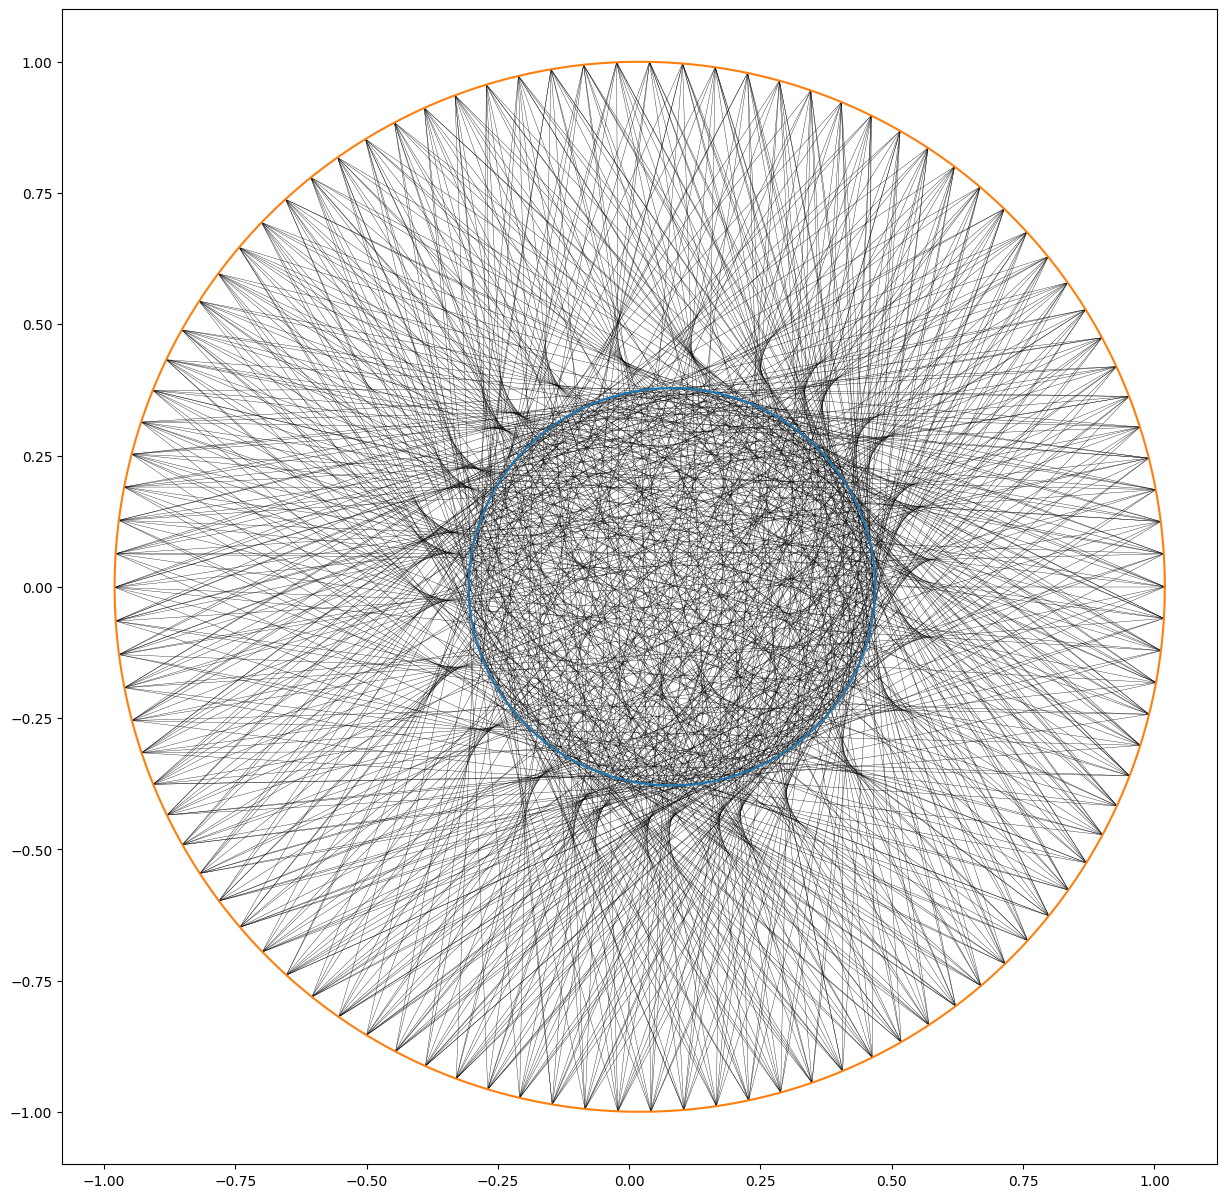

In [44]:
fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)

plt.gca().set_aspect("equal")


n = 10

timestep = 0.01 * orbital_periods[2]

bar = progressbar.ProgressBar(max_value=1000)

mercury_y_predicted, mercury_x_predicted = theta_graph(2.1*math.pi, orbital_periods[0], eccentricities[0])
earth_y_predicted, earth_x_predicted = theta_graph(2.1*math.pi, orbital_periods[2], eccentricities[2])

for i in range(100*n):
    bar.update(i)
    mercury_theta = np.interp((timestep*i) % orbital_periods[0], mercury_y_predicted, mercury_x_predicted)
    mercury_r = (semi_major_axes[0]*(1-(eccentricities[0] ** 2)))/(1-(eccentricities[0] * np.cos(mercury_theta)))
    mercury_x = mercury_r*np.cos(mercury_theta)
    mercury_y = mercury_r*np.sin(mercury_theta)
    
    earth_theta = np.interp((timestep*i) % orbital_periods[2], earth_y_predicted, earth_x_predicted)
    earth_r = (semi_major_axes[2]*(1-(eccentricities[2] ** 2)))/(1-(eccentricities[2] * np.cos(earth_theta)))
    earth_x = earth_r*np.cos(earth_theta)
    earth_y = earth_r*np.sin(earth_theta)
    
    x_values = [mercury_x, earth_x]
    y_values = [mercury_y, earth_y]
    ax.plot(x_values, y_values, c='black', linestyle="-", lw=0.25)
    
mercury_x_values = []
mercury_y_values = []
earth_x_values = []
earth_y_values = []
for t in np.linspace(0, 2*math.pi, 1000):
    mercury_r = (semi_major_axes[0]*(1-(eccentricities[0] ** 2)))/(1-(eccentricities[0] * np.cos(t)))
    mercury_x = mercury_r*np.cos(t)
    mercury_y = mercury_r*np.sin(t)
    mercury_x_values.append(mercury_x)
    mercury_y_values.append(mercury_y)
    
    earth_r = (semi_major_axes[2]*(1-(eccentricities[2] ** 2)))/(1-(eccentricities[2] * np.cos(t)))
    earth_x = earth_r*np.cos(t)
    earth_y = earth_r*np.sin(t)
    earth_x_values.append(earth_x)
    earth_y_values.append(earth_y)
    
ax.plot(mercury_x_values, mercury_y_values)
ax.plot(earth_x_values, earth_y_values)
    

plt.show()

 99% (904 of 905) |##################### | Elapsed Time: 0:03:22 ETA:   0:00:00

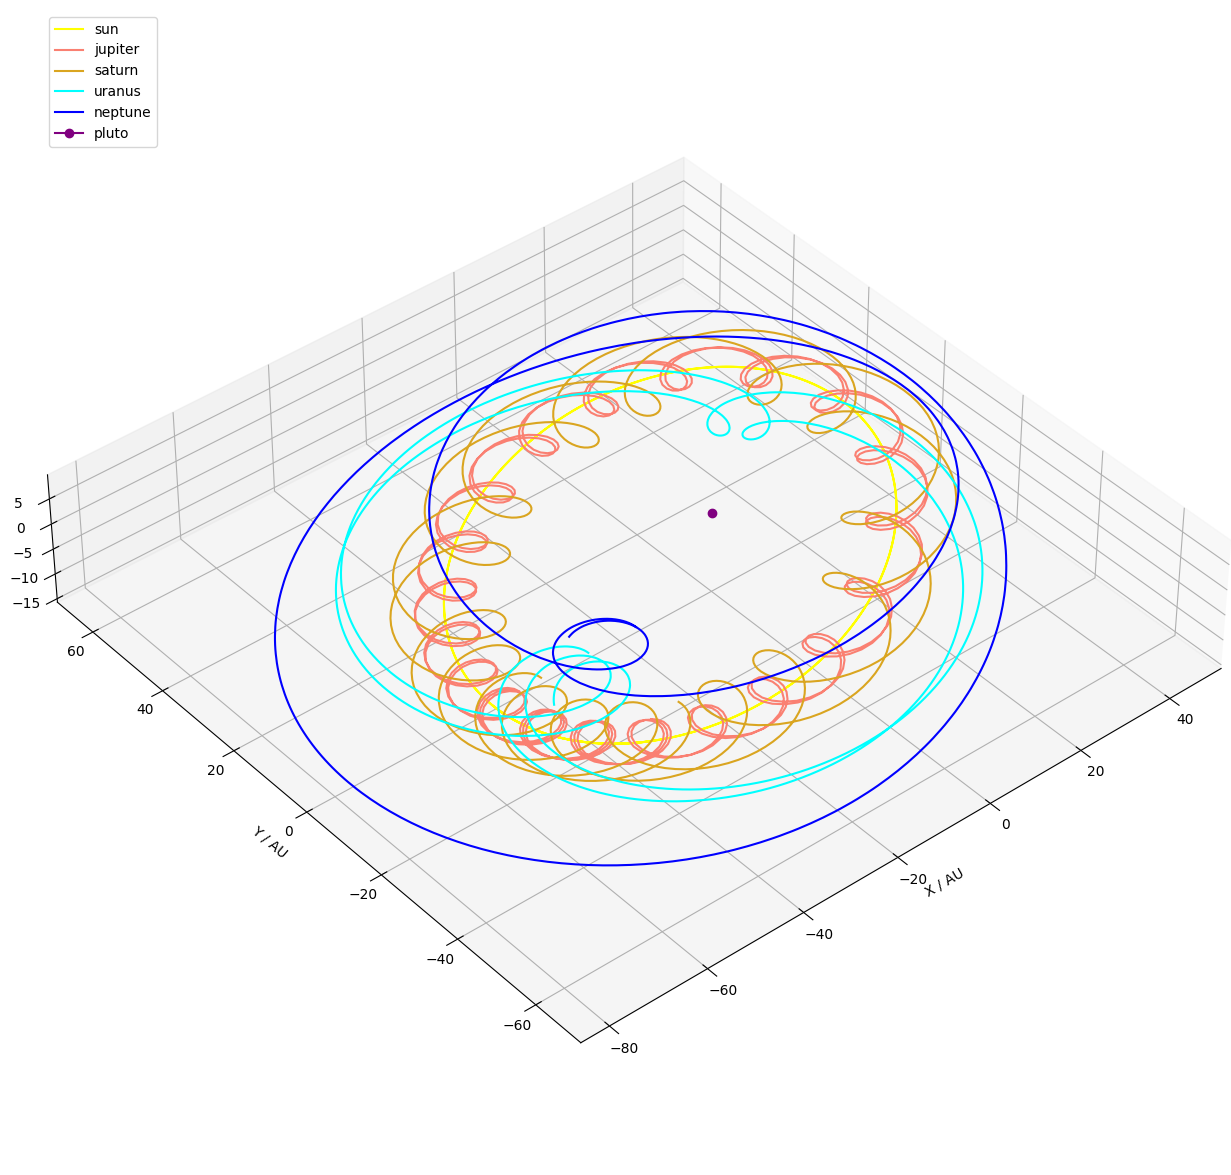

In [177]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=(1, 1, 0.2))


timestep = 0.02 * orbital_periods[5]

sun_orbits = 6

sun_x_list = []
sun_y_list = []
sun_z_list = []
jupiter_x_list = []
jupiter_y_list = []
jupiter_z_list = []
saturn_x_list = []
saturn_y_list = []
saturn_z_list = []
saturn_z_list = []
uranus_x_list = []
uranus_y_list = []
uranus_z_list = []
neptune_x_list = []
neptune_y_list = []
neptune_z_list = []

pluto_x = 0
pluto_y = 0
pluto_z = 0

iterations = math.floor(sun_orbits * 18 * orbital_periods[8] / orbital_periods[5])

bar = progressbar.ProgressBar(max_value=(iterations))

sun_y_predicted, sun_x_predicted = theta_graph(2*math.pi*sun_orbits*orbital_periods[8]/orbital_periods[8] + 1, orbital_periods[8], eccentricities[8])
jupiter_y_predicted, jupiter_x_predicted = theta_graph(2*math.pi*sun_orbits*orbital_periods[8]/orbital_periods[4] +1, orbital_periods[4], eccentricities[4])
saturn_y_predicted, saturn_x_predicted = theta_graph(2*math.pi*sun_orbits*orbital_periods[8]/orbital_periods[5] + 1, orbital_periods[5], eccentricities[5])
uranus_y_predicted, uranus_x_predicted = theta_graph(2*math.pi*sun_orbits*orbital_periods[8]/orbital_periods[6] + 1, orbital_periods[6], eccentricities[6])
neptune_y_predicted, neptune_x_predicted = theta_graph(2*math.pi*sun_orbits*orbital_periods[8]/orbital_periods[7] + 1, orbital_periods[7], eccentricities[7])

for i in range(iterations):
    bar.update(i)
    sun_theta = np.interp(timestep*i, sun_y_predicted, sun_x_predicted)
    sun_r = (semi_major_axes[8]*(1-(eccentricities[8] ** 2)))/(1-(eccentricities[8] * np.cos(sun_theta)))
    sun_x = -sun_r*np.cos(sun_theta)*np.cos(inclination_angles[8])
    sun_y = -sun_r*np.sin(sun_theta)
    sun_z = -sun_r*np.cos(sun_theta)*np.sin(inclination_angles[8])
    
    jupiter_theta = np.interp(timestep*i, jupiter_y_predicted, jupiter_x_predicted)
    jupiter_r = (semi_major_axes[4]*(1-(eccentricities[4] ** 2)))/(1-(eccentricities[4] * np.cos(jupiter_theta)))
    jupiter_x = sun_x + jupiter_r*np.cos(jupiter_theta)*np.cos(inclination_angles[4])
    jupiter_y = sun_y + jupiter_r*np.sin(jupiter_theta)
    jupiter_z = sun_z + jupiter_r*np.cos(jupiter_theta)*np.sin(inclination_angles[4])
    
    saturn_theta = np.interp(timestep*i, saturn_y_predicted, saturn_x_predicted)
    saturn_r = (semi_major_axes[5]*(1-(eccentricities[5] ** 2)))/(1-(eccentricities[5] * np.cos(saturn_theta)))
    saturn_x = sun_x + saturn_r*np.cos(saturn_theta)*np.cos(inclination_angles[5])
    saturn_y = sun_y + saturn_r*np.sin(saturn_theta)
    saturn_z = sun_z + saturn_r*np.cos(saturn_theta)*np.sin(inclination_angles[5])
    
    uranus_theta = np.interp(timestep*i, uranus_y_predicted, uranus_x_predicted)
    uranus_r = (semi_major_axes[6]*(1-(eccentricities[6] ** 2)))/(1-(eccentricities[6] * np.cos(uranus_theta)))
    uranus_x = sun_x + uranus_r*np.cos(uranus_theta)*np.cos(inclination_angles[6])
    uranus_y = sun_y + uranus_r*np.sin(uranus_theta)
    uranus_z = sun_z + uranus_r*np.cos(uranus_theta)*np.sin(inclination_angles[6])
    
    neptune_theta = np.interp(timestep*i, neptune_y_predicted, neptune_x_predicted)
    neptune_r = (semi_major_axes[7]*(1-(eccentricities[7] ** 2)))/(1-(eccentricities[7] * np.cos(neptune_theta)))
    neptune_x = sun_x + neptune_r*np.cos(neptune_theta)*np.cos(inclination_angles[7])
    neptune_y = sun_y + neptune_r*np.sin(neptune_theta)
    neptune_z = sun_z + neptune_r*np.cos(neptune_theta)*np.sin(inclination_angles[7])
    
    sun_x_list.append(sun_x)
    sun_y_list.append(sun_y)
    sun_z_list.append(sun_z)
    jupiter_x_list.append(jupiter_x)
    jupiter_y_list.append(jupiter_y)
    jupiter_z_list.append(jupiter_z)
    saturn_x_list.append(saturn_x)
    saturn_y_list.append(saturn_y)
    saturn_z_list.append(saturn_z)
    uranus_x_list.append(uranus_x)
    uranus_y_list.append(uranus_y)
    uranus_z_list.append(uranus_z)
    neptune_x_list.append(neptune_x)
    neptune_y_list.append(neptune_y)
    neptune_z_list.append(uranus_z)
    

sun_plot, = ax.plot3D(sun_x_list, sun_y_list, sun_z_list, color='yellow', label='sun')
jupiter_plot, = ax.plot3D(jupiter_x_list, jupiter_y_list, jupiter_z_list, color='salmon', label='jupiter')
saturn_plot, = ax.plot3D(saturn_x_list, saturn_y_list, saturn_z_list, color='goldenrod', label='saturn')
uranus_plot, = ax.plot3D(uranus_x_list, uranus_y_list, uranus_z_list, color='aqua', label='uranus')
neptune_plot, = ax.plot3D(neptune_x_list, neptune_y_list, neptune_z_list, color='blue', label='neptune')
pluto_plot, = ax.plot3D(pluto_x, pluto_y, pluto_z, color='purple', marker='o', label='pluto')

ax.legend(handles=[sun_plot, jupiter_plot, saturn_plot, uranus_plot, neptune_plot, pluto_plot], loc='upper left')
ax.set_xlabel('X / AU')
ax.set_ylabel('Y / AU')
ax.set_zlabel('Z / AU')
ax.view_init(elev=40, azim=230)


plt.savefig('OuterPlanetsRelToPluto3D.png');
plt.show()
    

 99% (9988 of 10000) |################## | Elapsed Time: 0:00:41 ETA:   0:00:00

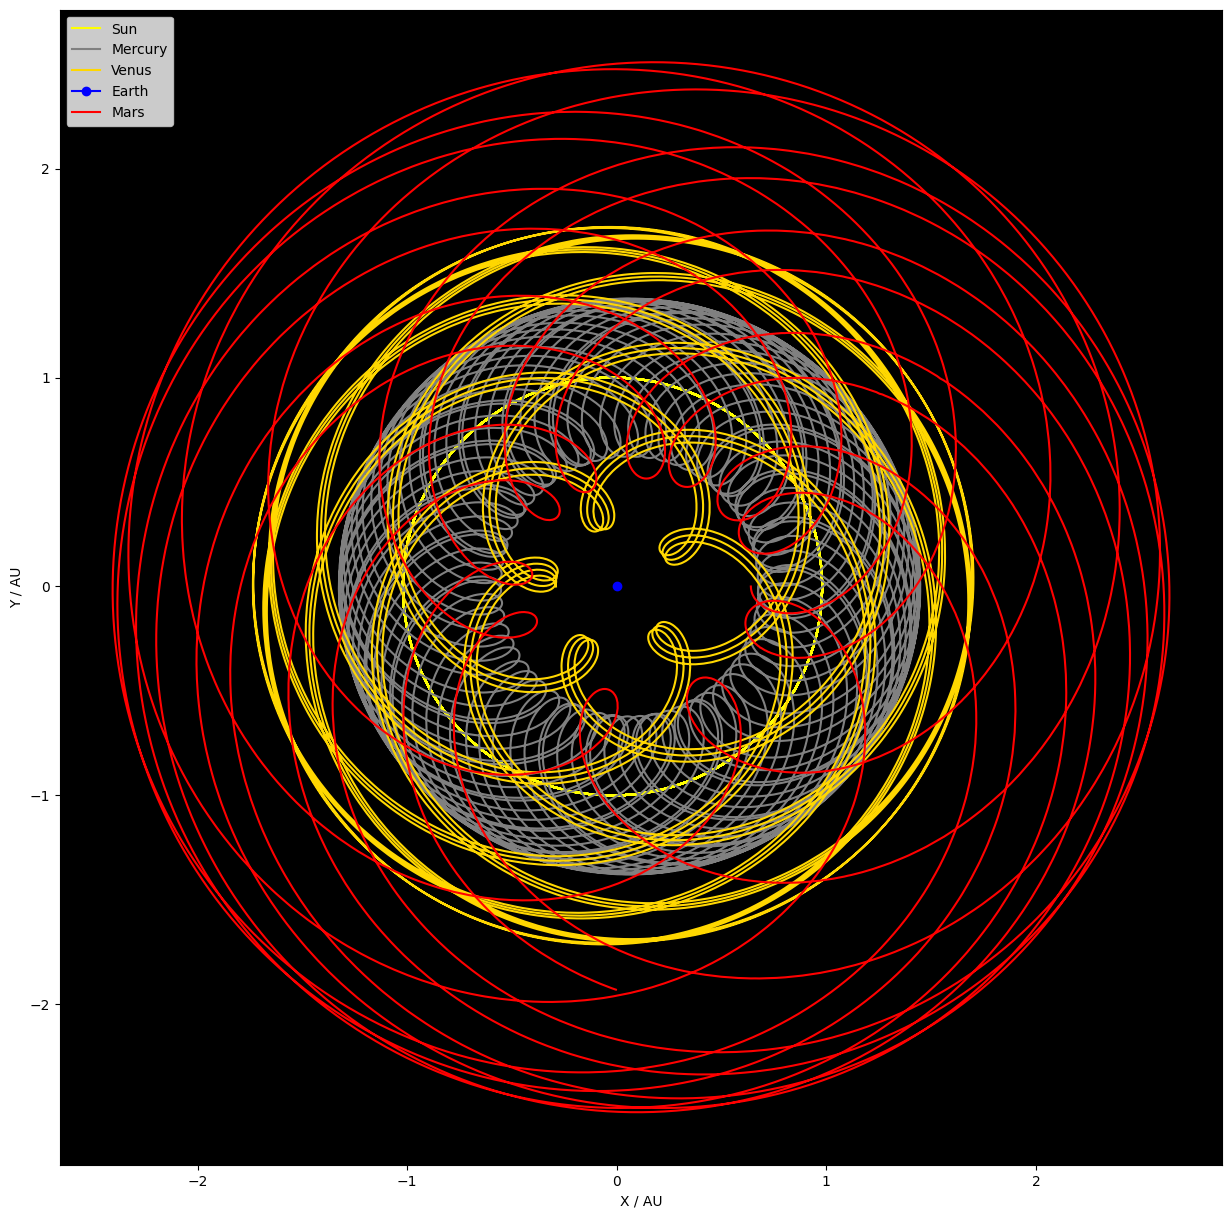

In [30]:
semi_major_axes = [0.387, 0.723, 1.523]
orbital_periods = [0.241, 0.615, 1.881]
eccentricities = [0.21, 0.01, 0.09]
plots = [[], [], [], []]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot()

timestep = 0.01 * orbital_periods[0]

sun_orbits = 100

sun_x_list = []
sun_y_list = []
mercury_y_list = []
mercury_x_list = []
venus_y_list = []
venus_x_list = []
mars_y_list = []
mars_x_list = []


iterations = sun_orbits * 100

bar = progressbar.ProgressBar(max_value=(iterations))

sun_y_predicted, sun_x_predicted = theta_graph(2.1*math.pi, 1, 0.02)
mercury_y_predicted, mercury_x_predicted = theta_graph(2.1*math.pi, orbital_periods[0], eccentricities[0])
venus_y_predicted, venus_x_predicted = theta_graph(2.1*math.pi, orbital_periods[1], eccentricities[1])
mars_y_predicted, mars_x_predicted = theta_graph(2.1*math.pi, orbital_periods[2], eccentricities[2])

for i in range(iterations + 1):
    bar.update(i)
    sun_theta = np.interp((timestep*i) % 1.00, sun_y_predicted, sun_x_predicted)
    sun_r = (1-(0.02 ** 2))/(1-(0.02 * np.cos(sun_theta)))
    sun_x = -sun_r*np.cos(sun_theta)
    sun_y = -sun_r*np.sin(sun_theta)
    
    mercury_theta = np.interp((timestep*i) % orbital_periods[0], mercury_y_predicted, mercury_x_predicted)
    mercury_r = (semi_major_axes[0]*(1-(eccentricities[0] ** 2)))/(1-(eccentricities[0] * np.cos(mercury_theta)))
    mercury_x = sun_x + mercury_r*np.cos(mercury_theta)
    mercury_y = sun_y + mercury_r*np.sin(mercury_theta)
    
    venus_theta = np.interp((timestep*i) % orbital_periods[1], venus_y_predicted, venus_x_predicted)
    venus_r = (semi_major_axes[1]*(1-(eccentricities[1] ** 2)))/(1-(eccentricities[1] * np.cos(venus_theta)))
    venus_x = sun_x + venus_r*np.cos(venus_theta)
    venus_y = sun_y + venus_r*np.sin(venus_theta)
    
    mars_theta = np.interp((timestep*i) % orbital_periods[2], mars_y_predicted, mars_x_predicted)
    mars_r = (semi_major_axes[2]*(1-(eccentricities[2] ** 2)))/(1-(eccentricities[2] * np.cos(mars_theta)))
    mars_x = sun_x + mars_r*np.cos(mars_theta)
    mars_y = sun_y + mars_r*np.sin(mars_theta)

    sun_x_list.append(sun_x)
    sun_y_list.append(sun_y)
    mercury_x_list.append(mercury_x)
    mercury_y_list.append(mercury_y)
    venus_x_list.append(venus_x)
    venus_y_list.append(venus_y)
    mars_x_list.append(mars_x)
    mars_y_list.append(mars_y)
    
ax.set_facecolor("black")
    
sun_plot, = ax.plot(sun_x_list, sun_y_list, color='yellow', label='Sun')
mercury_plot, = ax.plot(mercury_x_list, mercury_y_list, color='gray', label='Mercury')
venus_plot, = ax.plot(venus_x_list, venus_y_list, color='gold', label='Venus')
mars_plot, = ax.plot(mars_x_list, mars_y_list, color='red', label='Mars')
earth_plot, = ax.plot(0, 0, color='blue', label='Earth', marker='o')

ax.legend(handles=[sun_plot, mercury_plot, venus_plot, earth_plot, mars_plot], loc='upper left')
ax.set_xlabel('X / AU')
ax.set_ylabel('Y / AU')

plt.savefig("InnerPlanetsRelToEarth2D.png")
plt.show()
    
    
    


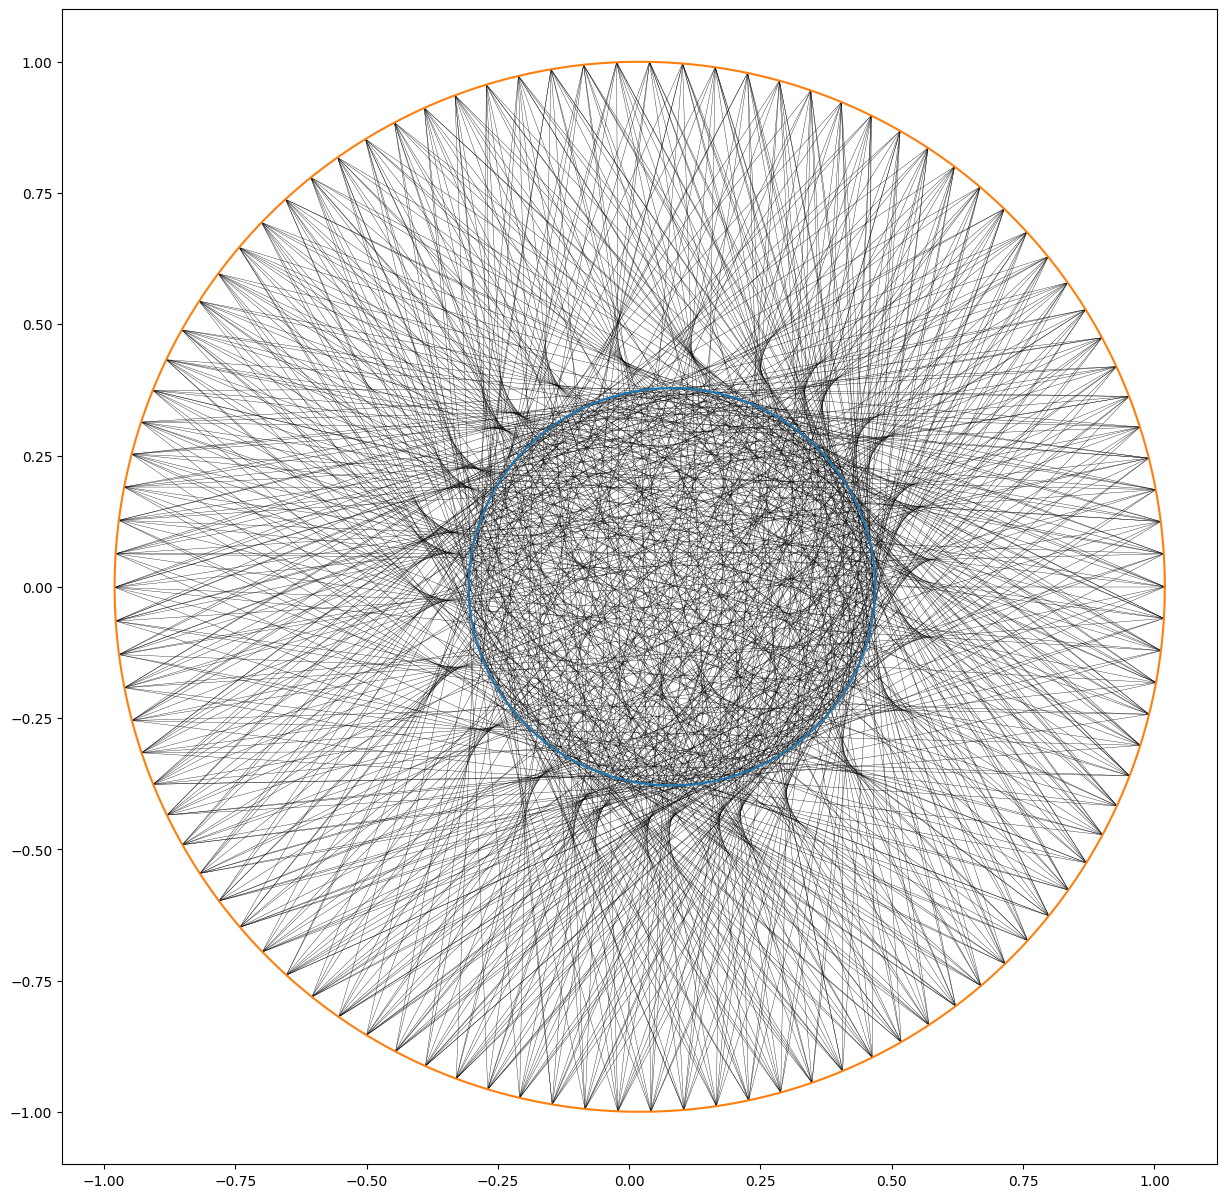

In [46]:
import math
import numpy as np
import matplotlib.pyplot as plt
import io
import json
import base64

def theta_graph(theta, P, eccentricity):
    def integrand(theta_integrand, P, eccentricity):
        return (P * ((1-(eccentricity**2)) ** (3/2)) * (1/(2 * math.pi * ((1 - (eccentricity*np.cos(theta_integrand))) ** 2))))
    curr_I = 0
    curr_theta = 0
    cum_I = [0]
    cum_x = [0]
    h = 1/1000
    iterations = math.floor(theta/h)
    for i in range(iterations):
        prev_theta = curr_theta
        curr_theta += h
        if len(cum_I) <= 2:
            curr_I += (1/3)*h*integrand(curr_theta, P, eccentricity)
        elif len(cum_I) % 2 == 0:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + integrand(prev_theta, P, eccentricity))
        else:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + (3*integrand(prev_theta, P, eccentricity)))
        cum_I.append(curr_I)
        cum_x.append(cum_x[-1] + h)
    return cum_I, cum_x

def lambda_handler(event):
    
    planets_dict = {
        "Mercury": 0,
        "Venus": 1,
        "Earth": 2,
        "Mars": 3,
        "Jupiter": 4,
        "Saturn": 5,
        "Uranus": 6,
        "Neptune": 7,
        "Pluto": 8
    }
    
    semi_major_axes = [0.387, 0.723, 1.000, 1.523, 5.202, 9.576, 19.293, 30.246, 39.509]
    orbital_periods = [0.241, 0.615, 1.000, 1.881, 11.861, 29.628, 84.747, 166.344, 248.348]
    eccentricities = [0.21, 0.01, 0.02, 0.09, 0.05, 0.06, 0.05, 0.01, 0.25]
    
    planet_1_orbital_period = orbital_periods[planets_dict[event['QueryStringParameters']['Planet1']]]
    planet_1_semi_major_axis = semi_major_axes[planets_dict[event['QueryStringParameters']['Planet1']]]
    planet_1_eccentricity = eccentricities[planets_dict[event['QueryStringParameters']['Planet1']]]
    
    planet_2_orbital_period = orbital_periods[planets_dict[event['QueryStringParameters']['Planet2']]]
    planet_2_semi_major_axis = semi_major_axes[planets_dict[event['QueryStringParameters']['Planet2']]]
    planet_2_eccentricity = eccentricities[planets_dict[event['QueryStringParameters']['Planet2']]]

    fig, ax = plt.subplots()

    plt.gca().set_aspect("equal")
    fig.set_figheight(15)
    fig.set_figwidth(15)

    n = 10

    planet_1_y_predicted, planet_1_x_predicted = theta_graph(2.1*math.pi, planet_1_orbital_period, planet_1_eccentricity)
    planet_2_y_predicted, planet_2_x_predicted = theta_graph(2.1*math.pi, planet_2_orbital_period, planet_2_eccentricity)

    for i in range(100*n):
        planet_1_theta = np.interp((i/100*planet_2_orbital_period) % planet_1_orbital_period, planet_1_y_predicted, planet_1_x_predicted)
        planet_1_r = (planet_1_semi_major_axis*(1-(planet_1_eccentricity ** 2)))/(1-(planet_1_eccentricity * np.cos(planet_1_theta)))
        planet_1_x = planet_1_r*np.cos(planet_1_theta)
        planet_1_y = planet_1_r*np.sin(planet_1_theta)

        planet_2_theta = np.interp((i%100)/100*planet_2_orbital_period, planet_2_y_predicted, planet_2_x_predicted)
        planet_2_r = (planet_2_semi_major_axis*(1-(planet_2_eccentricity ** 2)))/(1-(planet_2_eccentricity * np.cos(planet_2_theta)))
        planet_2_x = planet_2_r*np.cos(planet_2_theta)
        planet_2_y = planet_2_r*np.sin(planet_2_theta)

        x_values = [planet_1_x, planet_2_x]
        y_values = [planet_1_y, planet_2_y]
        plt.plot(x_values, y_values, c='black', linestyle="-", lw=0.25)

    planet_1_x_values = []
    planet_1_y_values = []
    planet_2_x_values = []
    planet_2_y_values = []
    
    for t in np.linspace(0, 2*math.pi, 1000):
        planet_1_r = (planet_1_semi_major_axis*(1-(planet_1_eccentricity ** 2)))/(1-(planet_1_eccentricity * np.cos(t)))
        planet_1_x = planet_1_r*np.cos(t)
        planet_1_y = planet_1_r*np.sin(t)
        planet_1_x_values.append(planet_1_x)
        planet_1_y_values.append(planet_1_y)

        planet_2_r = (planet_2_semi_major_axis*(1-(planet_2_eccentricity ** 2)))/(1-(planet_2_eccentricity * np.cos(t)))
        planet_2_x = planet_2_r*np.cos(t)
        planet_2_y = planet_2_r*np.sin(t)
        planet_2_x_values.append(planet_2_x)
        planet_2_y_values.append(planet_2_y)

    plt.plot(planet_1_x_values, planet_1_y_values)
    plt.plot(planet_2_x_values, planet_2_y_values)
    
    my_stringIObytes = io.BytesIO()
    plt.savefig(my_stringIObytes, format='jpg')
    my_stringIObytes.seek(0)
    base_64_data = base64.b64encode(my_stringIObytes.read())
    base_64 = str(base_64_data)[2:-1]
    
    return {
        'statusCode': 200,
        'body': json.dumps(base_64)
    }

    
data_to_pass = {
    'QueryStringParameters': {
        'Planet1': 'Mercury',
        'Planet2': 'Earth'
    }
}

lambda_handler(data_to_pass);

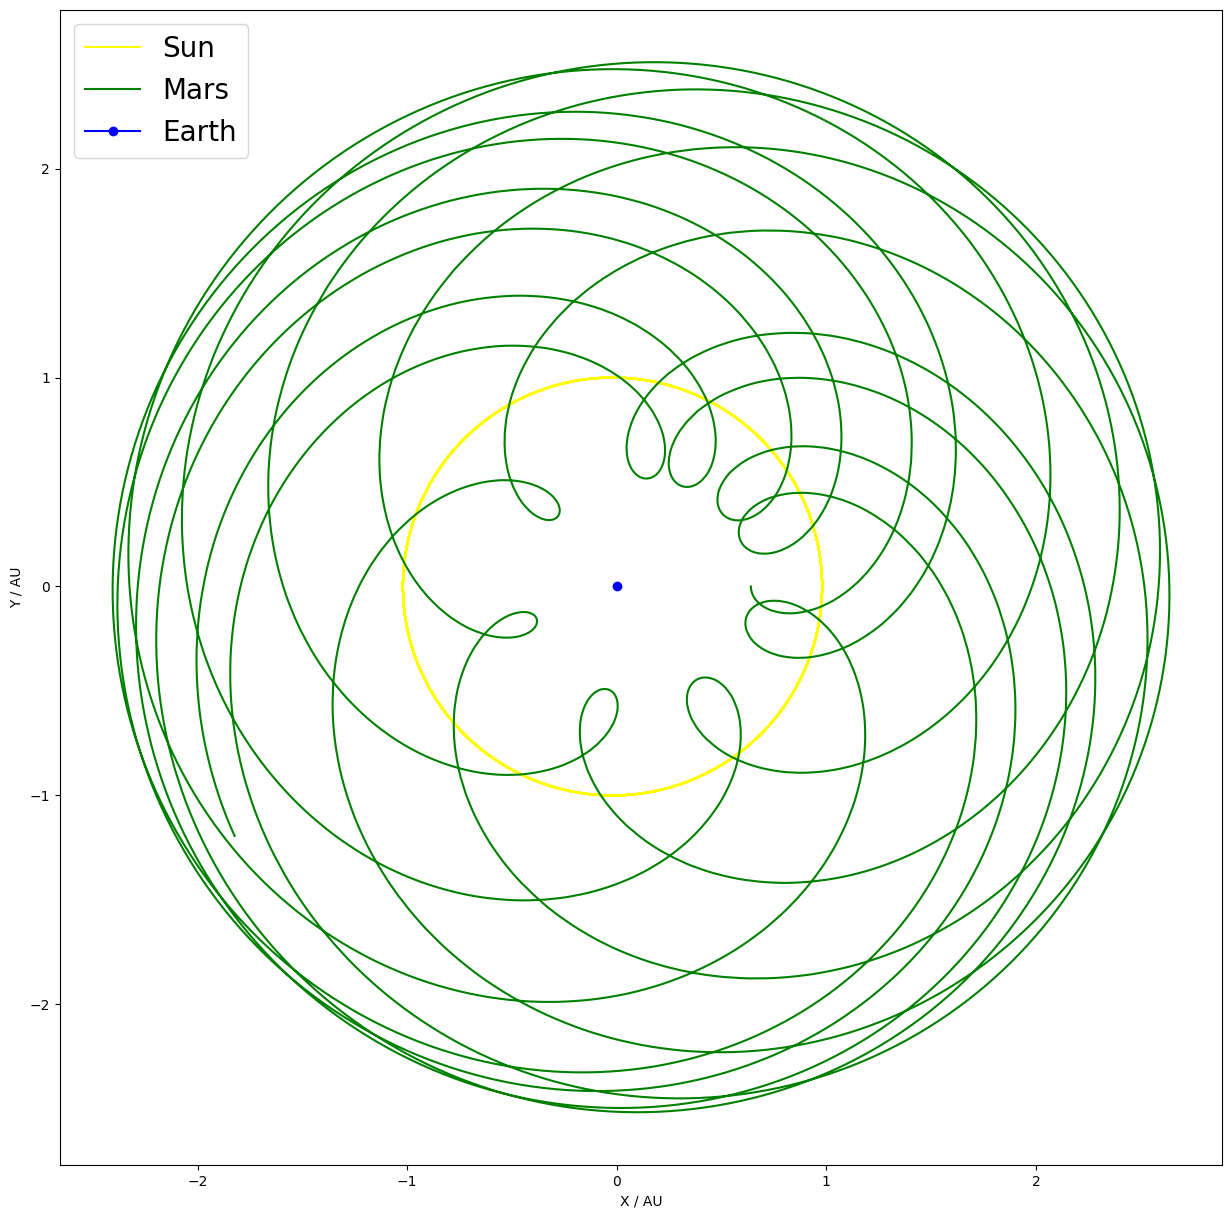

In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt
import io
import json
import base64

def theta_graph(theta, P, eccentricity):
    def integrand(theta_integrand, P, eccentricity):
        return (P * ((1-(eccentricity**2)) ** (3/2)) * (1/(2 * math.pi * ((1 - (eccentricity*np.cos(theta_integrand))) ** 2))))
    curr_I = 0
    curr_theta = 0
    cum_I = [0]
    cum_x = [0]
    h = 1/1000
    iterations = math.floor(theta/h)
    for i in range(iterations):
        prev_theta = curr_theta
        curr_theta += h
        if len(cum_I) <= 2:
            curr_I += (1/3)*h*integrand(curr_theta, P, eccentricity)
        elif len(cum_I) % 2 == 0:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + integrand(prev_theta, P, eccentricity))
        else:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + (3*integrand(prev_theta, P, eccentricity)))
        cum_I.append(curr_I)
        cum_x.append(cum_x[-1] + h)
    return cum_I, cum_x

def lambda_handler(event):
    
    planets_dict = {
        "Mercury": 0,
        "Venus": 1,
        "Earth": 2,
        "Mars": 3,
        "Jupiter": 4,
        "Saturn": 5,
        "Uranus": 6,
        "Neptune": 7,
        "Pluto": 8
    }
    
    semi_major_axes = [0.387, 0.723, 1.000, 1.523, 5.202, 9.576, 19.293, 30.246, 39.509]
    orbital_periods = [0.241, 0.615, 1.000, 1.881, 11.861, 29.628, 84.747, 166.344, 248.348]
    eccentricities = [0.21, 0.01, 0.02, 0.09, 0.05, 0.06, 0.05, 0.01, 0.25]
    
    b_orbital_period = orbital_periods[planets_dict[event['QueryStringParameters']['Planet1']]]
    b_semi_major_axis = semi_major_axes[planets_dict[event['QueryStringParameters']['Planet1']]]
    b_eccentricity = eccentricities[planets_dict[event['QueryStringParameters']['Planet1']]]
    
    c_orbital_period = orbital_periods[planets_dict[event['QueryStringParameters']['Planet2']]]
    c_semi_major_axis = semi_major_axes[planets_dict[event['QueryStringParameters']['Planet2']]]
    c_eccentricity = eccentricities[planets_dict[event['QueryStringParameters']['Planet2']]]

    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot()

    star_orbits = 20

    star_x_list = []
    star_y_list = []
    c_x_list = []
    c_y_list = []

    iterations = star_orbits * 200

    star_y_predicted, star_x_predicted = theta_graph(2.1*math.pi, b_orbital_period, b_eccentricity)
    c_y_predicted, c_x_predicted = theta_graph(2.1*math.pi, c_orbital_period, c_eccentricity)

    for i in range(iterations + 1):
        star_theta = np.interp((i/200*b_orbital_period) % b_orbital_period, star_y_predicted, star_x_predicted)
        star_r = (b_semi_major_axis*(1-(b_eccentricity ** 2)))/(1-(b_eccentricity * np.cos(star_theta)))
        star_x = -star_r*np.cos(star_theta)
        star_y = -star_r*np.sin(star_theta)

        c_theta = np.interp((i/200*b_orbital_period) % c_orbital_period, c_y_predicted, c_x_predicted)
        c_r = (c_semi_major_axis*(1-(c_eccentricity ** 2)))/(1-(c_eccentricity * np.cos(c_theta)))
        c_x = star_x + c_r*np.cos(c_theta)
        c_y = star_y + c_r*np.sin(c_theta)

        star_x_list.append(star_x)
        star_y_list.append(star_y)
        c_x_list.append(c_x)
        c_y_list.append(c_y)

    star_plot, = ax.plot(star_x_list, star_y_list, color='yellow', label='Sun')
    c_plot, = ax.plot(c_x_list, c_y_list, color='green', label=event['QueryStringParameters']['Planet2'])
    b_plot, = ax.plot(0, 0, color="blue", marker="o", label=event['QueryStringParameters']['Planet1'])

    ax.legend(handles=[star_plot, c_plot, b_plot], loc='upper left', fontsize="20")
    ax.set_xlabel('X / AU')
    ax.set_ylabel('Y / AU')

    my_stringIObytes = io.BytesIO()
    plt.savefig(my_stringIObytes, format='jpg')
    my_stringIObytes.seek(0)
    base_64_data = base64.b64encode(my_stringIObytes.read())
    base_64 = str(base_64_data)[2:-1]
    
    return {
        'statusCode': 200,
        'body': json.dumps(base_64)
    }


data_to_pass = {
    'QueryStringParameters': {
        'Planet1': 'Earth',
        'Planet2': 'Mars'
    }
}

lambda_handler(data_to_pass);


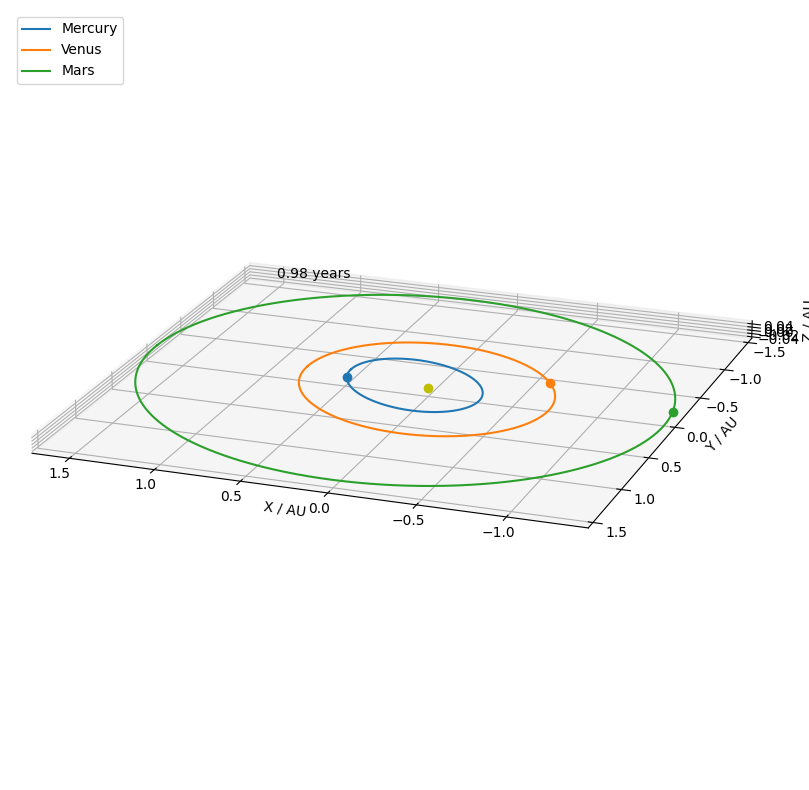

In [49]:
import math
import numpy as np
import io
import json
import base64
import matplotlib.pyplot as plt
import matplotlib.animation as anim

def theta_graph(theta, P, eccentricity):
    def integrand(theta_integrand, P, eccentricity):
        return (P * ((1-(eccentricity**2)) ** (3/2)) * (1/(2 * math.pi * ((1 - (eccentricity*np.cos(theta_integrand))) ** 2))))
    curr_I = 0
    curr_theta = 0
    cum_I = [0]
    cum_x = [0]
    h = 1/1000
    iterations = math.floor(theta/h)
    for i in range(iterations):
        prev_theta = curr_theta
        curr_theta += h
        if len(cum_I) <= 2:
            curr_I += (1/3)*h*integrand(curr_theta, P, eccentricity)
        elif len(cum_I) % 2 == 0:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + integrand(prev_theta, P, eccentricity))
        else:
            curr_I += (1/3)*h*(integrand(curr_theta, P, eccentricity) + (3*integrand(prev_theta, P, eccentricity)))
        cum_I.append(curr_I)
        cum_x.append(cum_x[-1] + h)
    return cum_I, cum_x

def lambda_handler(event, context):

    semi_major_axes = [0.387, 0.723, 1.000, 1.523, 5.202, 9.576, 19.293, 30.246, 39.509]
    orbital_periods = [0.241, 0.615, 1.000, 1.881, 11.861, 29.628, 84.747, 166.344, 248.348]
    eccentricities = [0.21, 0.01, 0.02, 0.09, 0.05, 0.06, 0.05, 0.01, 0.25]
    inclination_angles = [i*2*math.pi/360 for i in [7.00, 3.39, 0.00, 1.95, 1.31, 2.49, 0.77, 1.77, 17.5]]

    time_elapsed = 0
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(projection='3d')
    handles = []

    names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]
    colors = ["red", "blue", "green", "orange", "brown", "pink", "gray", "purple", "cyan"]

    for key in event['queryStringParameters']:
        if event['queryStringParameters'][key] == 'true':
            i = names.index(key)
            x_values = []
            y_values = []
            z_values = []
            for t in np.linspace(0, 2*math.pi, 1000):
                r = (semi_major_axes[i]*(1-(eccentricities[i] ** 2)))/(1-(eccentricities[i] * np.cos(t)))
                x = r*np.cos(t)*np.cos(inclination_angles[i])
                y = r*np.sin(t)
                z = r*np.cos(t)*np.sin(inclination_angles[i])
                x_values.append(x)
                y_values.append(y)
                z_values.append(z)
            handle, = ax.plot3D(x_values, y_values, z_values, label=names[i])
            handles.append(handle)

    axes_limit = 0
    for key in event['queryStringParameters']:
        if event['queryStringParameters'][key] == 'true':
            i = names.index(key)
            if axes_limit < semi_major_axes[i]:
                axes_limit = semi_major_axes[i]
            
            
    ax.legend(handles=handles, loc='upper left')
    label = ax.text(axes_limit, -axes_limit, 0, "{:.2f}".format(time_elapsed) + " years")
    sun, = ax.plot3D(0, 0, 0, 'yo')

    plots = []
    for key in event['queryStringParameters']:
        if event['queryStringParameters'][key] == 'true':
            i = names.index(key)
            planet_x = semi_major_axes[i] * (1 + eccentricities[i]) * np.cos(inclination_angles[i])
            planet_y = 0
            planet_z = 0
            planet, = ax.plot3D(planet_x, planet_y, planet_z, marker='o')

            plots.append(planet)

    y_predicted_array = []
    x_predicted_array = []

    for key in event['queryStringParameters']:
        if event['queryStringParameters'][key] == 'true':
            i = names.index(key)
            planet_predicteds = theta_graph(2.1*math.pi, orbital_periods[i], eccentricities[i])
            y_predicted_array.append(planet_predicteds[0])
            x_predicted_array.append(planet_predicteds[1])
    
    ax.margins(x=0, y=0)

    def update(i):

        timestep = 0.02

        time_elapsed = timestep*i
        label.set_text("{:.2f}".format(time_elapsed) + " years")

        for plot in plots:
            plot.remove()

        j = 0
        for key in event['queryStringParameters']:
            if event['queryStringParameters'][key] == 'true':
                k = names.index(key)
                planet_theta = np.interp((timestep*i) % orbital_periods[k], y_predicted_array[j], x_predicted_array[j])
                planet_r = (semi_major_axes[k]*(1-(eccentricities[k] ** 2)))/(1-(eccentricities[k] * np.cos(planet_theta)))
                planet_x = planet_r*np.cos(planet_theta)*np.cos(inclination_angles[k])
                planet_y = planet_r*np.sin(planet_theta)
                planet_z = planet_r*np.cos(planet_theta)*np.sin(inclination_angles[k])
                plot, = ax.plot3D(planet_x, planet_y, planet_z, color=handles[j].get_color(), marker='o')
                plots[j] = plot
                j += 1

        return plots

    ax.grid(color='lightgray', linestyle='--')
    plt.gca().set_aspect("equal")

    ax.set_xlabel('X / AU')
    ax.set_ylabel('Y / AU')
    ax.set_zlabel('Z / AU')

    ax.view_init(elev=20, azim=110)

    a = anim.FuncAnimation(fig, update,
                           frames=50, 
                           interval=20,
                           blit=True)
    
    f = "/tmp/video.gif" 
    writergif = anim.PillowWriter(fps=50) 
    a.save(f, writer=writergif)
    
    with open("/tmp/video.gif", "rb") as video_file:
        encoded_string = str(base64.b64encode(video_file.read()))[2:-1]
        
    response = { "encodedImage": encoded_string }
    
    plt.show()
    
    return {
        "statusCode": 200,
        "body": json.dumps(response)
    }

data_to_pass = {
  "queryStringParameters": {
    "Mercury": "true",
    "Venus": "true",
    "Earth": "false",
    "Mars": "true",
    "Jupiter": "false",
    "Saturn": "false",
    "Uranus": "false",
    "Neptune": "false",
    "Pluto": "false"
  }
}

lambda_handler(data_to_pass, 5);